In [100]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from qutip import *
import matplotlib.gridspec as gridspec


In [17]:
N1 = 4
N2 = 4

In [18]:
class quadrature_operator:
    def __init__(self, n):
        self.n = n

        a = destroy(n)
        adag = a.dag()

        self.x = (a + adag)*1/np.sqrt(2)
        self.p = 1j * (adag - a)*1/np.sqrt(2)

class operator:
    def __init__(self,n):
        self.n = n

        a = destroy(self.n)
        adag = a.dag()

        self.a = a
        self.adag = adag

    def squeezing_operator(self,phi,z):

        exponent =  ((-phi*1j*self.a**2).expm()) - (phi*1j*self.adag**2).expm()
        self.squeezing_operator = ( np.log(z)/2 * exponent ).expm()

        return self.squeezing_operator

    def rotation_operator(self,phi):
        self.rotation_operator = (1j * phi * self.adag * self.a).expm()
        return self.rotation_operator

    def beamsplitter_operator(self,theta, N1, N2):

        self.theta = theta
        self.N1 = N1
        self.N2 = N2

        a1 = destroy(N1)
        a2 = destroy(N2)

        x1 = (a1 + a1.dag())/np.sqrt(2)
        p1 = (a1 - a1.dag())/(1j*np.sqrt(2))
        x2 = (a2 + a2.dag())/np.sqrt(2)
        p2 = (a2 - a2.dag())/(1j*np.sqrt(2))

        bs = ((p1 * x2 - p2 * x1) * 1j * theta ).expm()

        return bs
    
    def displacement_operator_x(self,s, p):
        self.s = s
        self.p = p

        self.displacement_operator = (- 1j * s * p).expm()
        return self.displacement_operator
    
    def vacuum_state(self):
        vacuum = basis(self.n,0)

        return vacuum

    
class transformation:
    def __init__(self, operator, quadrature):

        self.operator = operator
        self.quadrature = quadrature
        self.transformation = operator.dag() * quadrature * operator 


In [19]:
op = operator(n=N1)

delta_x = 0.1
delta_p = delta_x

mu = 2

x = np.linspace(-6, 6, 100)
p = np.linspace(-6, 6, 100)

x2 = np.linspace(-5, 5, 100)

j = 1

$ \ket{j, \Delta_x, \Delta_p} = \sum_n{ e^{-\frac{1}{2}\cdot \Delta_p^2((2n + j)\sqrt{\pi\hbar})^2}\hat{X}}(2n + j)\sqrt{\pi\hbar}\ket{\Delta_x}$

$\ket{\Delta_x}=\hat{S}(\Delta_x^{-1})\ket{0}$

In [20]:
#vacuum = op.vacuum_state()


#squeezing = op.squeezing_operator(phi = 0, z=1/delta_x)
#displacement = op.displacement_operator_x(s=0, p=p)

## CAT STATES

In [21]:
N = 60
psi = coherent(N,alpha=1) - coherent(N,alpha=-1)

sq = squeeze(N, z = 0.5)

psi_sq = (sq * psi).unit()


In [22]:

W_3 = wigner(psi_sq, x, p)

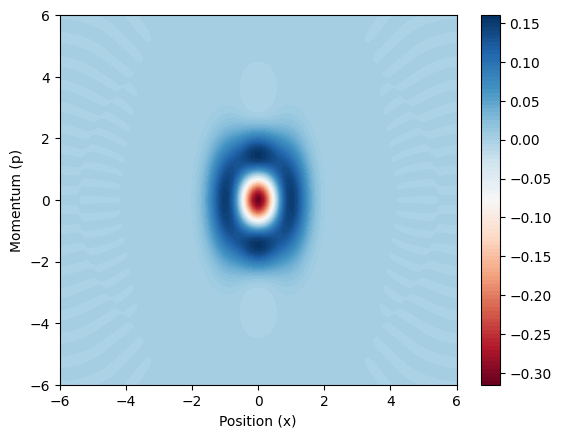

In [23]:
import matplotlib.pyplot as plt
plt.contourf(x, p, W_3, levels=100, cmap='RdBu')
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.colorbar()
plt.show()

## GKP STATES

In [24]:
def GKP_states(N, delta_x, delta_p, j):

    n_max = 20
    n = np.arange(-n_max, n_max+1)

    sq_operator = squeeze(N, z = np.log(1/delta_x))


    vacuum = basis(N,0)

    #first apply squeeze
    psi_0 = sq_operator * vacuum
    psi_1 = 0 * psi_0

    for i in range(len(n)):
        dis_operator = displace(N, alpha = (2*n[i]+j)*np.sqrt(np.pi))
        exponent = -0.5 * delta_p**2 * ( (2*n[i]+j) * np.sqrt(2)) **2
        psi_1 += dis_operator * psi_0 * np.exp(exponent)

    return psi_1.unit()

N=400

In [25]:
gkp_state_0 = GKP_states(N, delta_x=0.4, delta_p=0.4, j = 0)
gkp_state_1 = GKP_states(N, delta_x=0.1, delta_p=0.1, j = 0)
gkp_state_2 = GKP_states(N, delta_x=0.3, delta_p=0.3*1/3, j = 0)
gkp_state_3 = GKP_states(N, delta_x=0.3, delta_p=0.3*3, j = 0)

In [26]:
gkp_state_01 = GKP_states(N, delta_x=0.4, delta_p=0.4, j = 1)
gkp_state_11 = GKP_states(N, delta_x=0.1, delta_p=0.1, j = 1)
gkp_state_21 = GKP_states(N, delta_x=0.3, delta_p=0.3*1/3, j = 1)
gkp_state_31 = GKP_states(N, delta_x=0.3, delta_p=0.3*3, j = 1)

In [69]:
x = np.linspace(-8, 8, 100)
p = np.linspace(-8, 8, 100)


In [ ]:

W_GKP_0 = wigner(gkp_state_0, x, p)
W_GKP_1 = wigner(gkp_state_1, x, p)
W_GKP_2 = wigner(gkp_state_2, x, p)
W_GKP_3 = wigner(gkp_state_3, x, p)

In [28]:
W_GKP_01 = wigner(gkp_state_01, x, p)
W_GKP_11 = wigner(gkp_state_11, x, p)
W_GKP_21 = wigner(gkp_state_21, x, p)
W_GKP_31 = wigner(gkp_state_31, x, p)

In [29]:
vmin = min(W_GKP_0.min(), W_GKP_1.min(), W_GKP_2.min(), W_GKP_3.min(), W_GKP_01.min(), W_GKP_11.min(), W_GKP_21.min(), W_GKP_31.min())
vmax = max(W_GKP_0.max(), W_GKP_1.max(), W_GKP_2.max(), W_GKP_3.max(), W_GKP_01.max(), W_GKP_11.max(), W_GKP_21.max(), W_GKP_31.max())

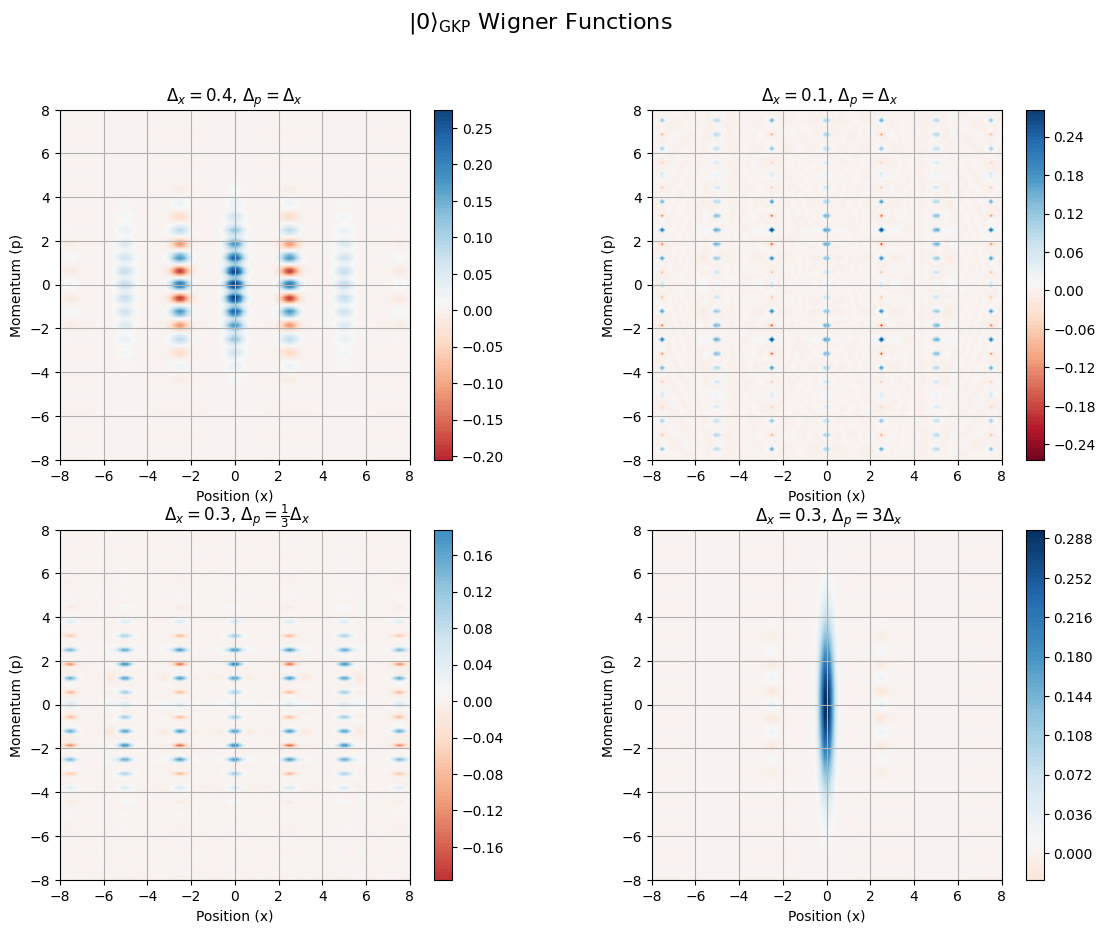

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_1, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_2, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_3, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r" $\Delta_x=0.3$, $\Delta_p=3\Delta_x$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

plt.show()


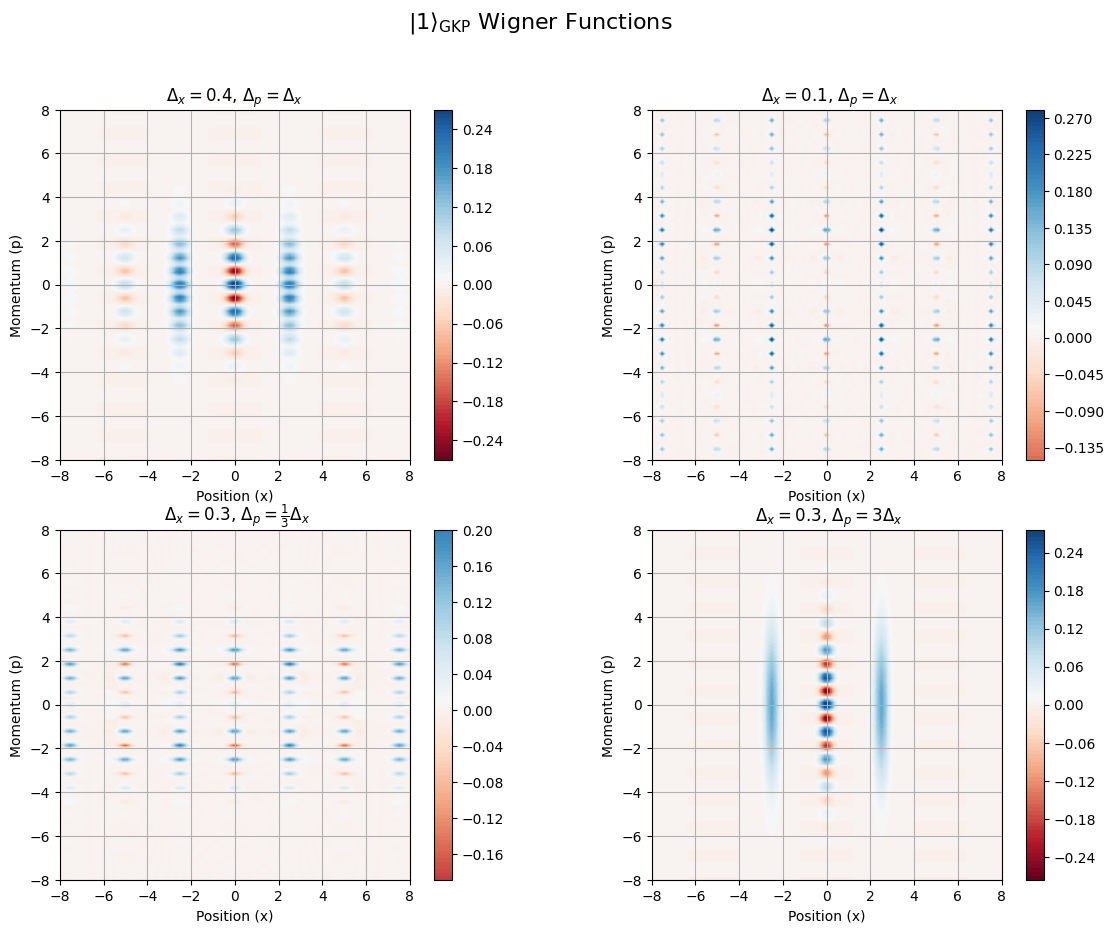

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plt.suptitle(r"$|1\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_11, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_21, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_31, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r" $\Delta_x=0.3$, $\Delta_p=3\Delta_x$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

plt.show()


In [109]:

Px = np.trapz(W_GKP_01, p, axis=0)  
Pp = np.trapz(W_GKP_01, x, axis=1)

/var/folders/l_/0gbbhqcj6wg0zv6lyz_3rhpc0000gn/T/ipykernel_63743/3793168670.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Px = np.trapz(W_GKP_01, p, axis=0)
/var/folders/l_/0gbbhqcj6wg0zv6lyz_3rhpc0000gn/T/ipykernel_63743/3793168670.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Pp = np.trapz(W_GKP_01, x, axis=1)


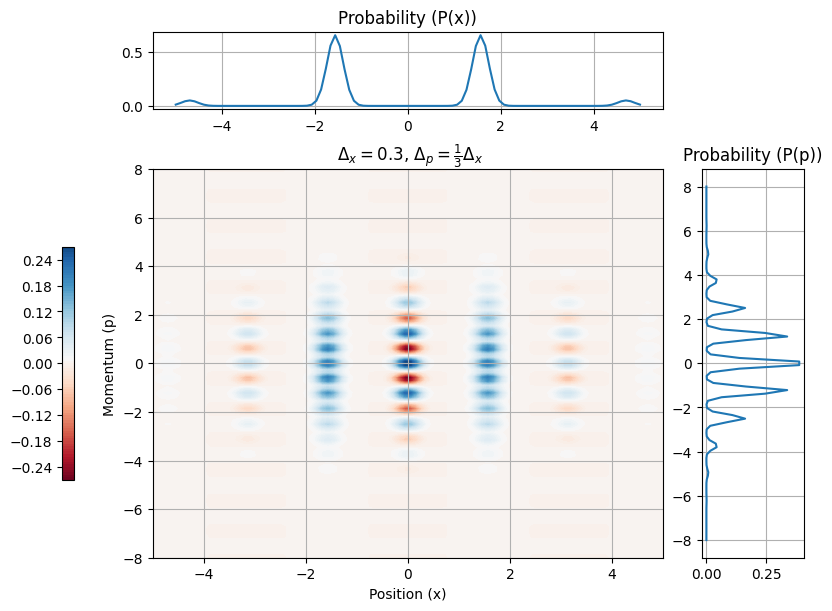

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

axs[0, 0].plot(x,Px)
axs[0, 0].set_title("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp,p)
axs[1, 1].set_title("Probability (P(p))")
axs[1, 1].grid()



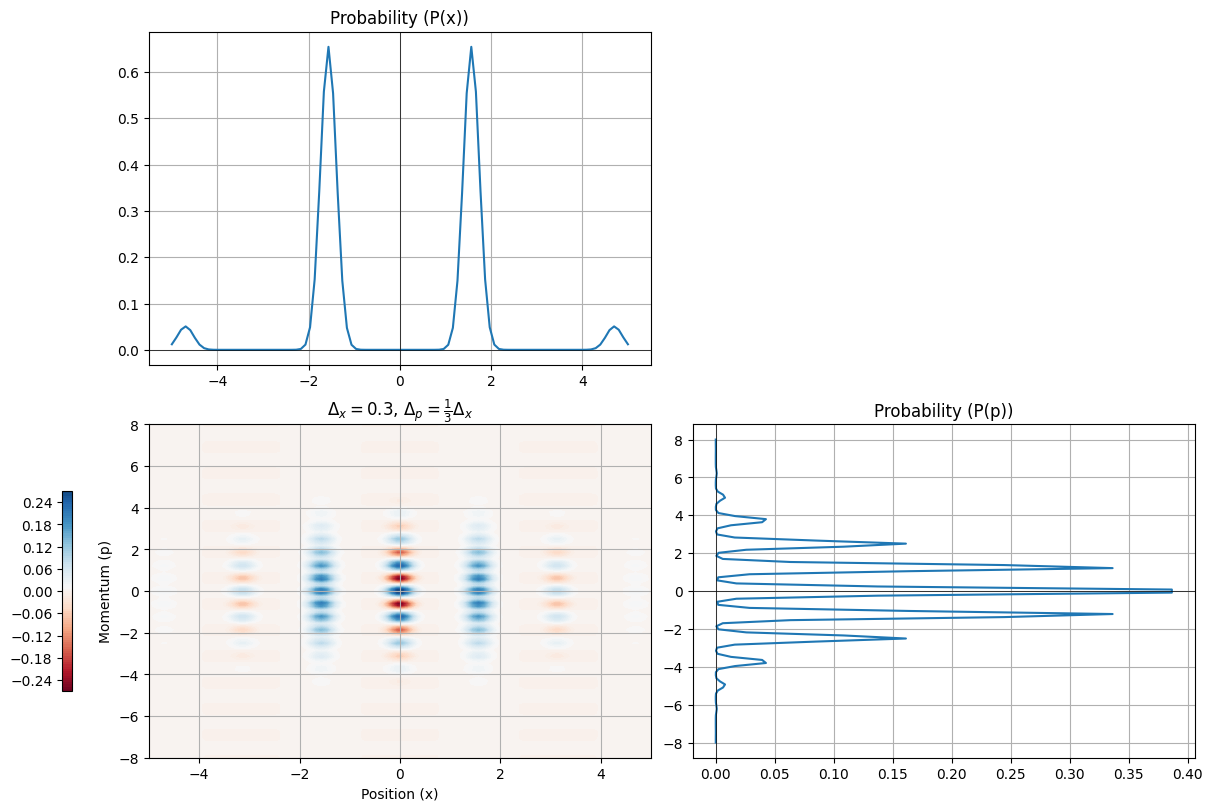

In [110]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

# Top-left: P(x)
axs[0, 0].plot(x, Px)
axs[0, 0].set_title("Probability (P(x))")
axs[0, 0].grid()
axs[0, 0].axhline(0, color='k', lw=0.5)
axs[0, 0].axvline(0, color='k', lw=0.5)

# Top-right: empty
axs[0, 1].axis('off')

# Bottom-left: Wigner function
cf3 = axs[1, 0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1, 0].set_title(r"$\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1, 0].set_xlabel("Position (x)")
axs[1, 0].set_ylabel("Momentum (p)")
axs[1, 0].grid()
fig.colorbar(cf3, ax=axs[1, 0], location='left', shrink=0.6)

# Bottom-right: P(p)
axs[1, 1].plot(Pp, p)
axs[1, 1].set_title("Probability (P(p))")
axs[1, 1].grid()
axs[1, 1].axhline(0, color='k', lw=0.5)
axs[1, 1].axvline(0, color='k', lw=0.5)

plt.show()
